In [1]:
import pandas as pd
import numpy as np
np.random.seed(2021)

In [2]:
xls = pd.ExcelFile("Assignment_3_Data.xlsx")
df1 = pd.read_excel(xls, 'Firm Characteristics',skiprows=6,header=1) # Corporate/Financial Characteristics
df2 = pd.read_excel(xls, 'Aggregates',skiprows=7,header=1) # Aggregate summary data
df3 = pd.read_excel(xls, 'Stock Prices',header=1) # This is the time series data


In [3]:
df3.dropna(axis="columns", inplace=True)
df3 = df3.apply(pd.to_numeric, errors='coerce').dropna(axis="columns")

In [4]:
sample = df3.drop(["Date", "IWV"], axis=1).sample(n=1000, axis=1) # Don't need the date and IWV columns
sample

,JW.A,AN,THG,INTL,CTSH,CMCS.A,PODD,UMBF,CMI,BH,...,TKR,EGBN,BREW,VC,FHN,MASI,LMT,CLI,KBAL,AIV
0,39.76468,35.70,30.36332,24.37,32.71372,11.07783,19.06,34.87081,79.32695,322.39934,...,25.01937,13.74545,6.34,29.54772,7.53402,17.94430,67.25118,20.89907,3.88750,19.33691
1,38.93661,33.26,30.00010,24.16,32.83568,11.18411,19.09,34.83448,80.41601,330.05115,...,25.11336,13.56364,6.04,29.83735,7.61641,17.59170,66.34105,20.59825,3.90870,18.92034
2,39.62373,34.05,29.96551,24.18,33.49523,11.28360,19.12,35.79731,82.50700,329.91359,...,25.39532,13.78182,6.04,29.85473,7.72626,17.59170,65.65231,20.57450,3.91577,19.25359
3,39.91443,33.44,29.63688,24.03,33.05718,11.16375,18.74,35.51573,81.48764,322.04684,...,25.42665,13.82727,6.19,30.41660,7.79950,17.60123,65.57851,20.52700,3.88750,19.12029
4,39.22732,33.80,29.95686,24.27,33.17167,11.40119,18.26,36.17881,83.82258,325.66641,...,26.16602,13.91818,6.04,30.15594,7.86358,18.02054,65.62771,20.53492,3.87336,18.89535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,54.10000,45.68,98.10000,39.70,74.40000,36.55000,61.02,74.33000,177.23000,346.21000,...,50.55000,67.40000,18.30,122.56000,19.02000,88.65000,320.73000,22.83000,20.01000,44.11000
1462,54.30000,46.32,98.87000,39.79,74.69000,36.50000,59.65,74.35000,178.40000,352.87000,...,51.55000,67.35000,18.45,124.03000,19.24000,87.14000,313.15000,22.86000,19.97000,43.75000
1463,54.05000,46.68,98.84000,40.00,74.25000,36.83000,57.99,73.07000,176.92000,347.02000,...,49.10000,67.50000,18.15,121.99000,19.06000,86.59000,312.43000,22.83000,19.92000,43.70000
1464,54.60000,47.77,99.22000,40.40,74.58000,36.27000,58.50,74.05000,178.64000,353.69000,...,48.75000,67.05000,17.80,126.57000,19.16000,87.08000,307.89000,22.43000,20.01000,43.35000


In [5]:
returns_all = df3.drop(["Date"], axis=1).reset_index(drop=True).astype(float).pct_change()
returns_all = returns_all.iloc[1:, :] # all but first row, because we can't get the returns of the first day
mean_returns_all = returns_all.mean() # Average DAILY returns 
cov_matrix_all = returns_all.cov() # Average DAILY covariance 

In [6]:
returns = sample.reset_index(drop=True).astype(float).pct_change(1)
returns = returns.iloc[1:, :] # all but first row, because we can't get the returns of the first day
mean_returns = returns.mean() # Average DAILY returns 
cov_matrix = returns.cov() # Average DAILY covariance 

In [7]:
# Annualize the data
mu_all = (1 + mean_returns_all) ** 252 - 1
sigma_all = 252 * cov_matrix_all  # Annualize the covariance matrix. Sigma so we have to sqrt
var_all = pd.Series(np.diag(sigma_all), index=[sigma_all.index, sigma_all.columns])

mu = (1 + mean_returns) ** 252 - 1
sigma = 252 * cov_matrix 

n = mu.size # This is a 1D array
risk_free_rate = 0.0085 # On December 31st, 2016 1yr treasury note yield was 0.85%

In [8]:
def calculate_beta(returns_asset, returns_benchmark, variance_benchmark):
    return(np.cov(returns_asset, returns_benchmark) / variance_benchmark)
    

In [9]:
var_IWV = float(var_all["IWV"])
returns_IWV = returns_all["IWV"].reset_index(drop=True, inplace=True)
betas = returns.apply(lambda x:  calculate_beta(x, returns_IWV, var_IWV), axis=0)

In [ ]:
# Generate random portfolios
def mu_portfolio(w: pd.DataFrame, mu: pd.DataFrame) -> float:
    return(w.T @ mu)

def sigma_portfolio(w: pd.DataFrame, sigma: pd.DataFrame) -> float:
    return(np.sqrt(w.T @ sigma @ w))

def beta_portfolio(w: pd.DataFrame, betas: pd.DataFrame) -> float:
    return(w.T @ betas)

def generate_random_portfolio(mu: pd.DataFrame, sigma: pd.DataFrame) -> dict:
    w = np.empty(0)
    for _ in range(len(mu)):
        w = np.append(w, np.random.uniform(0, 1))
    w = w / np.sum(w) # Make sure the sum of the weights is 1
    assert(np.isclose(np.sum(w), 1))
    w = np.random.permutation(w) # Shuffle the weights
    mu0 = mu_portfolio(w, mu)
    sigma0 = sigma_portfolio(w, sigma)
    beta0 = beta_portfolio(w, betas)
    return({"w": w, "mu": mu0, "sigma": sigma0, "beta" : beta0})

In [11]:
# Now we can generate a bunch of random portfolios
num_simulations = 10000
random_portfolios = [generate_random_portfolio(mu, sigma) for _ in range(num_simulations)]

<AxesSubplot:xlabel='sigma', ylabel='mu'>

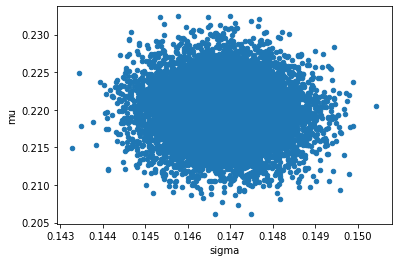

In [12]:
portfolio_df = pd.DataFrame(random_portfolios)
portfolio_df["Sharpe Ratio"] = portfolio_df.apply(lambda x : (x["mu"] - risk_free_rate) / x["sigma"], axis=1)
portfolio_df["Treynor Ratio"] = portfolio_df.apply(lambda x : (x["mu"] -  risk_free_rate) / x["beta"], axis=1)

portfolio_df.plot(x="sigma", y="mu", kind="scatter")


In [13]:
portfolio_df.sort_values(by="Sharpe Ratio", ascending=False).head(10)

,w,mu,sigma,Sharpe Ratio,Treynor Ratio
5555,"[0.0008582594086816618, 0.0008905772399259624,...",0.232310,0.145349,1.539808,1.539808
2562,"[0.0010016708464758398, 0.0019412855261626595,...",0.232431,0.145773,1.536162,1.536162
793,"[0.00044763858965237574, 0.0016009748848945344...",0.230317,0.144650,1.533479,1.533479
2552,"[0.0017265743704373022, 0.0005887717348749761,...",0.231413,0.145447,1.532611,1.532611
6920,"[0.0007210945620384614, 0.0011788771900873409,...",0.232267,0.146468,1.527754,1.527754
5223,"[0.0005148302379422802, 0.001443954478427715, ...",0.229391,0.144621,1.527377,1.527377
9132,"[0.00027938358190622553, 0.0006725016380891874...",0.229315,0.144625,1.526812,1.526812
7467,"[0.0012034839206677222, 0.0015176815383405357,...",0.230966,0.145948,1.524283,1.524283
5630,"[0.0017892394495606073, 0.001650251680407322, ...",0.232409,0.146980,1.523402,1.523402
8109,"[0.0015022802944696548, 0.0005080784742195131,...",0.229916,0.145440,1.522386,1.522386


In [14]:
mean_pbv = float(df2["P/BV [Latest] (x)"].iloc[[1]])
sd_pbv = float(df2["P/BV [Latest] (x)"].iloc[[4]])
z_score_pbv = -(df2["P/BV [Latest] (x)"] - mean_pbv) / sd_pbv